In [7]:
import serial
import serial.tools.list_ports
import pandas as pd
import numpy as np

# Connect to the Nicla make sure that arduino isn't on in case that might block access to com3
ports = serial.tools.list_ports.comports()
for n in ports:
    # Print the names of the devices connected to the computer - your Nicla will be one of them.
    print(n.description)
    print(n.device)
    
# You need to change the line below to the right Serial port for your Nicla:
dev = 'COM3'

# See baudrate=115200 below? This is the speed at which the Nicla communicates with the computer. Don't change it.
nicla = serial.Serial(port=dev, baudrate=115200, timeout=.1)

USB Serial Device (COM3)
COM3


In [8]:
# Number of readings to take make sure there is only sending 4 numbers or the following code won't apply
n_readings = 200
column_titles = ['time', 'temp', 'pressure', 'gas']

# Clear the buffer for the Nicla serial port - it may help to comment these 2 lines out, it may help to keep them!
nicla.flush()
nicla.reset_input_buffer()

# Start collecting data - tell the Nicla how many data points to take
nicla.write(bytes("{f0}".format(f0=n_readings), 'utf-8'))

# Create somewhere to store the data
data_table = np.zeros((n_readings, len(column_titles)))
# Uncomment the line below if you'd like to see what the data_table looks like - google "numpy zeros" to learn what the function is doing.
# print(data_table)

# Get the data from the Nicla create table to store data
for n in range(n_readings):
    # Read data from the Nicla up to '/n'
    data = nicla.readline()
    # Split the line read from the Nicla every time it finds a ','
    data = np.fromstring(data, sep=',')
    # Unless the data has the correct length, ignore it
    if len(data) == len(column_titles):
        data_table[n,:] = data

# Close the serial port
nicla.close()

# Put the data in a DataFrame
tpg_data = pd.DataFrame(data_table, columns=column_titles)
tpg_data

,time,temp,pressure,gas
0,0.0,0.00,0.0,0.0
1,0.0,0.00,0.0,0.0
2,0.0,0.00,0.0,0.0
3,0.0,0.00,0.0,0.0
4,0.0,0.00,0.0,0.0
...,...,...,...,...
195,554.0,29.95,1011.0,13735.0
196,556.0,29.95,1011.0,13735.0
197,559.0,29.95,1011.0,13735.0
198,562.0,29.95,1011.0,13735.0


In [9]:
# inspecting dataframe
tpg_data

,time,temp,pressure,gas
0,0.0,0.00,0.0,0.0
1,0.0,0.00,0.0,0.0
2,0.0,0.00,0.0,0.0
3,0.0,0.00,0.0,0.0
4,0.0,0.00,0.0,0.0
...,...,...,...,...
195,554.0,29.95,1011.0,13735.0
196,556.0,29.95,1011.0,13735.0
197,559.0,29.95,1011.0,13735.0
198,562.0,29.95,1011.0,13735.0


In [11]:
#selecting column of data
tpg_data['temp']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
195    29.95
196    29.95
197    29.95
198    29.95
199    29.95
Name: temp, Length: 200, dtype: float64

In [12]:
data_filtered = tpg_data[['time', 'temp']]
data_filtered

,time,temp
0,0.0,0.00
1,0.0,0.00
2,0.0,0.00
3,0.0,0.00
4,0.0,0.00
...,...,...
195,554.0,29.95
196,556.0,29.95
197,559.0,29.95
198,562.0,29.95


In [13]:
tpg_data[tpg_data['temp'] > 0]

,time,temp,pressure,gas
14,5.0,29.91,1011.03,13317.0
15,8.0,29.91,1011.03,13317.0
16,10.0,29.91,1011.03,13317.0
17,13.0,29.91,1011.03,13317.0
18,16.0,29.91,1011.03,13317.0
...,...,...,...,...
195,554.0,29.95,1011.00,13735.0
196,556.0,29.95,1011.00,13735.0
197,559.0,29.95,1011.00,13735.0
198,562.0,29.95,1011.00,13735.0


In [14]:
data_exercise1 = tpg_data
data_exercise1

,time,temp,pressure,gas
0,0.0,0.00,0.0,0.0
1,0.0,0.00,0.0,0.0
2,0.0,0.00,0.0,0.0
3,0.0,0.00,0.0,0.0
4,0.0,0.00,0.0,0.0
...,...,...,...,...
195,554.0,29.95,1011.0,13735.0
196,556.0,29.95,1011.0,13735.0
197,559.0,29.95,1011.0,13735.0
198,562.0,29.95,1011.0,13735.0


In [15]:
# this will return the first 3 rows of the DataFrame data_exercise - note that Python starts counting from 0 and ignore the last number you're requesting here.
data_exercise1.iloc[0:3]

,time,temp,pressure,gas
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


In [16]:
# this will return rows that have an index with a value between 0 and 20 - again, Python starts at 0, but keeps you on your toes by including the last number you're requesting.
data_exercise1.loc[0:20]

,time,temp,pressure,gas
0,0.0,0.00,0.00,0.0
1,0.0,0.00,0.00,0.0
2,0.0,0.00,0.00,0.0
3,0.0,0.00,0.00,0.0
4,0.0,0.00,0.00,0.0
5,0.0,0.00,0.00,0.0
6,0.0,0.00,0.00,0.0
7,0.0,0.00,0.00,0.0
8,0.0,0.00,0.00,0.0
9,0.0,0.00,0.00,0.0


In [17]:
data_exercise2 = tpg_data[tpg_data['temp'] > 0]
data_exercise2

,time,temp,pressure,gas
14,5.0,29.91,1011.03,13317.0
15,8.0,29.91,1011.03,13317.0
16,10.0,29.91,1011.03,13317.0
17,13.0,29.91,1011.03,13317.0
18,16.0,29.91,1011.03,13317.0
...,...,...,...,...
195,554.0,29.95,1011.00,13735.0
196,556.0,29.95,1011.00,13735.0
197,559.0,29.95,1011.00,13735.0
198,562.0,29.95,1011.00,13735.0


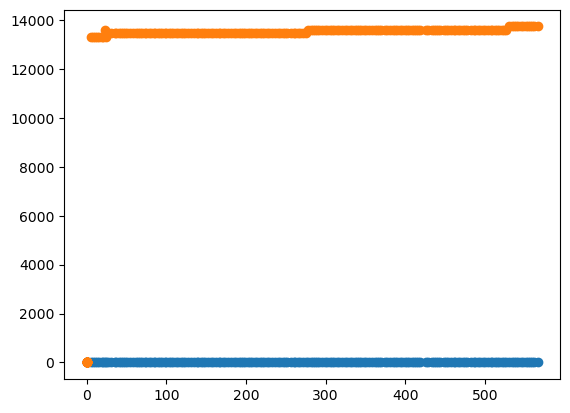

In [18]:
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False    # Remove annoying auto-offset
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()
# Add an axis to the figure
ax = fig.add_subplot(111)
# Tell the axis to plot the data - time on the x-axis, temperature on the y-axis
ax.scatter(tpg_data['time'], tpg_data['temp'])
# Tell the axis to plot the data - time on the x-axis, gas reading on the y-axis
ax.scatter(tpg_data['time'], tpg_data['gas'])
# Show the figure - not strictly necessary in jupyter notebook, but essential if you're writing a .py file
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
C:\Users\alexa\AppData\Local\Temp\ipykernel_26524\1345782934.py:8: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel('Gas Sensor Reading (a.u.) / Temperature ($^\circ$C)')


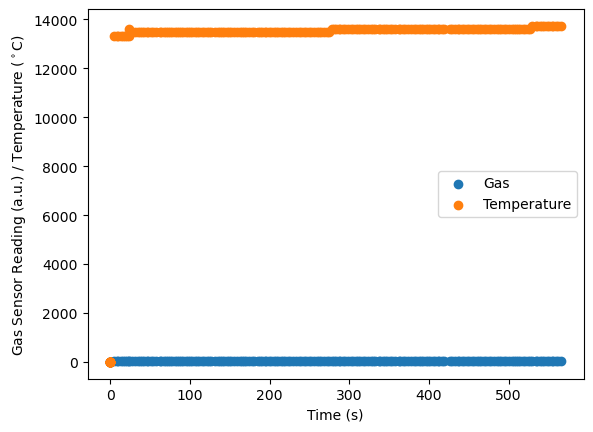

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data['time'], tpg_data['temp'])
ax.scatter(tpg_data['time'], tpg_data['gas'])

# Add some labels and a legend to the plot
ax.set_xlabel('Time (s)')
ax.set_ylabel('Gas Sensor Reading (a.u.) / Temperature ($^\circ$C)')
plt.legend(['Gas', 'Temperature'])
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\alexa\AppData\Local\Temp\ipykernel_26524\1819340983.py:4: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel('Temperature ($^\circ$C)')


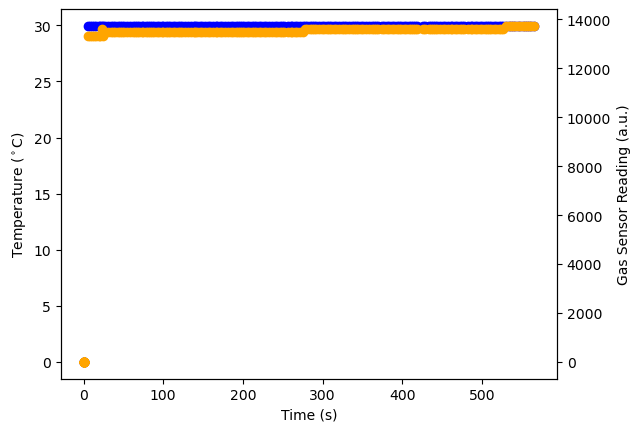

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data['time'], tpg_data['temp'], color='blue')
ax.set_ylabel('Temperature ($^\circ$C)')

# Add a second y-axis to the plot              
ax2 = ax.twinx()
# Plot a second data set on the second y-axis
ax2.scatter(tpg_data['time'], tpg_data['gas'], color='orange')
ax2.set_ylabel('Gas Sensor Reading (a.u.)')

ax.set_xlabel('Time (s)')
plt.show()

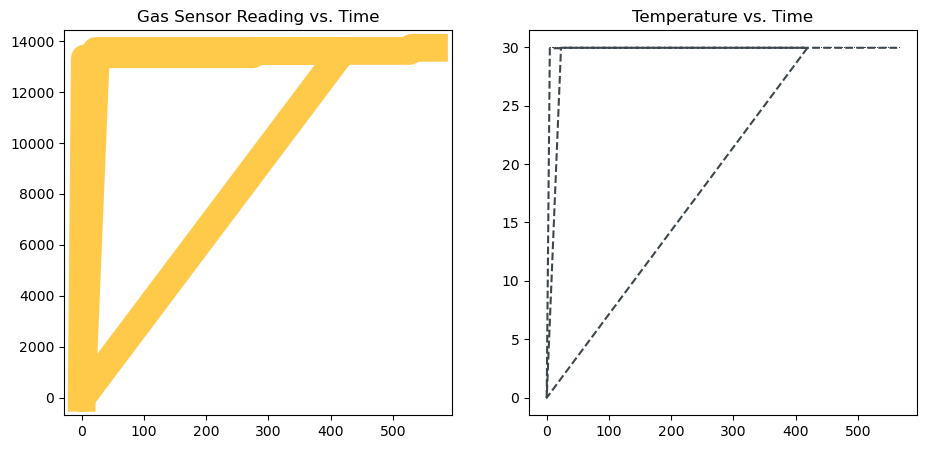

In [21]:
fig = plt.figure(figsize=(11,5))
# Create a subplot with 1 row and 2 columns - ax1 is in position 1
ax1 = fig.add_subplot(121)
# Create a subplot with 1 row and 2 columns - ax2 is in position 2
ax2 = fig.add_subplot(122)

# c=colour, it's used in the format c=(red, green, blue) where each value is between 0 and 1
ax1.plot(tpg_data['time'], tpg_data['gas'], linewidth=20, c=(1, 0.79, 0.29))
ax1.set_title('Gas Sensor Reading vs. Time')

ax2.plot(tpg_data['time'], tpg_data['temp'], linestyle='dashed', marker=',', markersize=12 ,c=(0.24, 0.28, 0.30))
ax2.set_title('Temperature vs. Time')

plt.show()

In [ ]:
tpg_data_filter = tpg_data[tpg_data['gas'] > 0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data_filter['time'], tpg_data_filter['gas'])
plt.show()

In [ ]:
lower_bound = tpg_data['gas'].quantile(0.01)
upper_bound = tpg_data['gas'].quantile(0.99)

# Here's the tricky bit - we ignore values that are below the lower bound or above the upper bound - ask ChatGPT what the code is doing!
data_clean = tpg_data[(tpg_data['gas'] > lower_bound) & (tpg_data['gas'] < upper_bound)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data_clean['time'], data_clean['gas'])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Gas (a.u.)')
plt.show()

In [ ]:
# Save graph - resolution @ 200 dots per inch, tight bounding box
filename = 'plot_name.png'

# The code below will save your figure to the directory where this code is stored.
plt.savefig(filename, dpi=200, bbox_inches='tight')